a system is **critical** if it is in transition between two phases.  water at its freezing point is a critical system.
* long tailed distributions of some physical quantities.  eg. crystal sizes are a power law
* Fractal Geometries
* variations in time that exhibit pink noise--"noise" is a time series with many frequency components.  In white noise all frequencies have equal power.  In pink noise, low-frequency components have more power than high-frequency.  Power at frequency f is proportional to 1/f.
* unstable.  small changes tend to change state of system.

Many natural systems exhibit criticality, but if unstable, why?

SOC means that, from any initial condition, the system tends toward a critical state and stay there without external control.


##Exercise 9.1 - Sand Pile
[paper link](http://cqb.pku.edu.cn/tanglab/pdf/1987-63.pdf)
* 2d cellular automaton where state of each cell represents slope of sand pile.  edges have slope 0.
* at each time step, cell is cehcked to see if it exceeds some critical value, K.  If so, "avalanche" occurs
    1. cell's slope is decreased by 4 and each neighbor is increased by 1
* initialize with some z > K for all and let evolve untill stabilizes.
* to observe effect of small perturbations:
    1. choose cell at random and increment its value by 1
    2. evolve system again until stabilizes
    3. measure D - the total number of cells affected by the resulting avalanche.
* distribution of D should be long-tailed.

In [326]:
class SandPile(Life):
    
    def __init__(self, k=4, n=10):
        self.n = n
        self.k = k
        self.array = np.zeros((n,n))
        a = np.full((n-2,n-2), k, dtype=np.int)
        self.array[1:n-1,1:n-1] = a
        
    def neighbors(self, row, col):
        return [(row+1, col),
                (row, col+1),
                (row-1, col),
                (row, col-1)]
        
        
    def step(self):
        a = np.copy(self.array)
        
        for row in xrange(self.n):
            for col in xrange(self.n):
                z = self.array[row, col]
                if z >= 4:
                    a[row, col] -= 4
                    for cell in self.neighbors(row, col):
                        try: a[cell] += 1
                        except IndexError: pass
        self.array = a

sp = SandPile(n=10)
for i in range(20):
    print 
    print sp.array
    sp.step()



[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  4.  4.  4.  4.  4.  4.  4.  4.  0.]
 [ 0.  4.  4.  4.  4.  4.  4.  4.  4.  0.]
 [ 0.  4.  4.  4.  4.  4.  4.  4.  4.  0.]
 [ 0.  4.  4.  4.  4.  4.  4.  4.  4.  0.]
 [ 0.  4.  4.  4.  4.  4.  4.  4.  4.  0.]
 [ 0.  4.  4.  4.  4.  4.  4.  4.  4.  0.]
 [ 0.  4.  4.  4.  4.  4.  4.  4.  4.  0.]
 [ 0.  4.  4.  4.  4.  4.  4.  4.  4.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

[[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  2.  3.  3.  3.  3.  3.  3.  2.  1.]
 [ 1.  3.  4.  4.  4.  4.  4.  4.  3.  1.]
 [ 1.  3.  4.  4.  4.  4.  4.  4.  3.  1.]
 [ 1.  3.  4.  4.  4.  4.  4.  4.  3.  1.]
 [ 1.  3.  4.  4.  4.  4.  4.  4.  3.  1.]
 [ 1.  3.  4.  4.  4.  4.  4.  4.  3.  1.]
 [ 1.  3.  4.  4.  4.  4.  4.  4.  3.  1.]
 [ 1.  2.  3.  3.  3.  3.  3.  3.  2.  1.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  0.]]

[[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  2.  4.  4.  4.  4.  4.  4.  2.  1.]
 [ 1.  4.  2.  3.  3.  3.  3.  2.  4.  1.]
 [ 1. 

starting animation



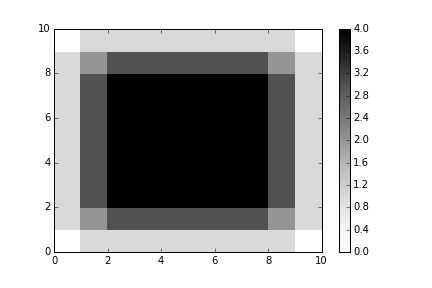
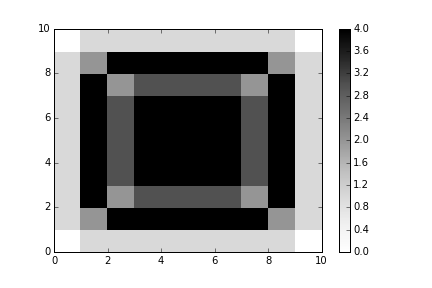
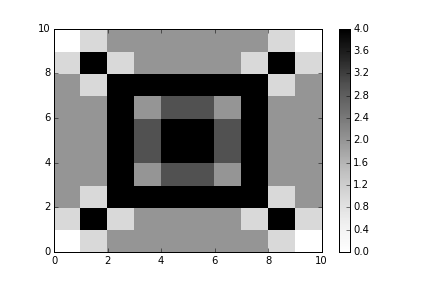
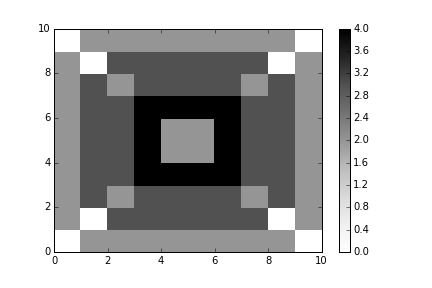
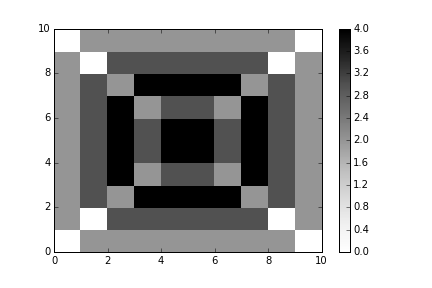
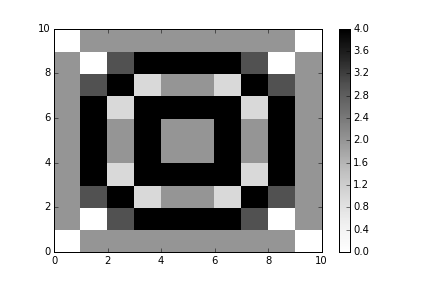
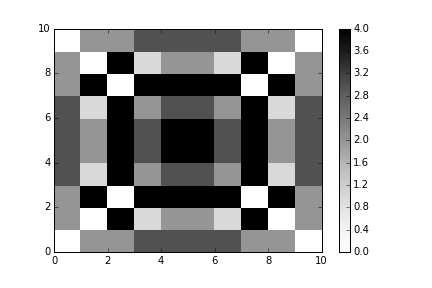
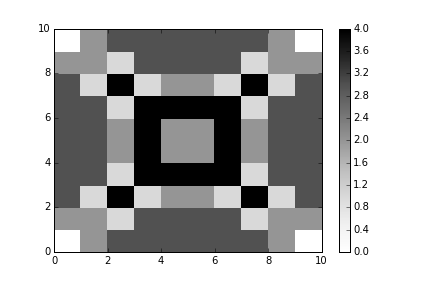
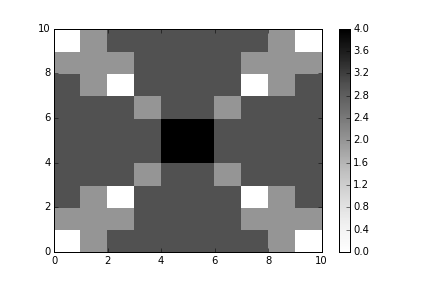
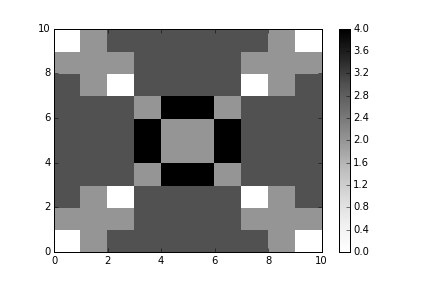
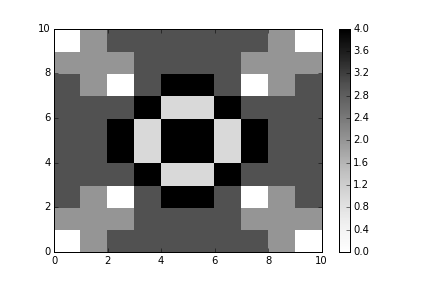
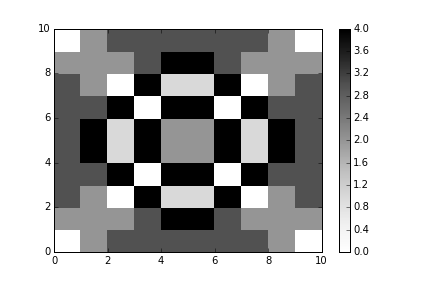
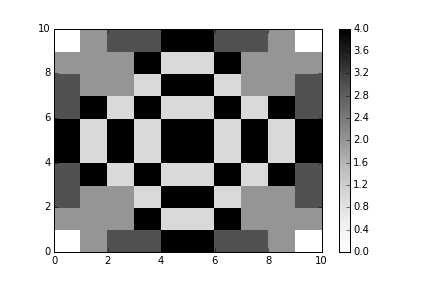
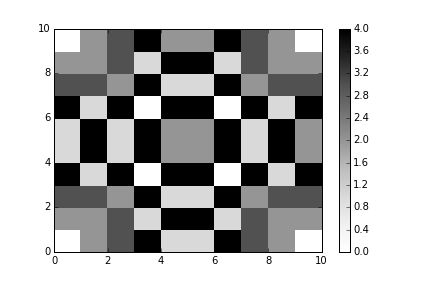
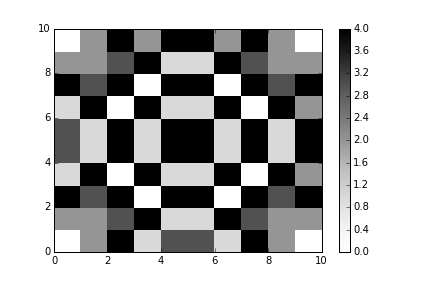
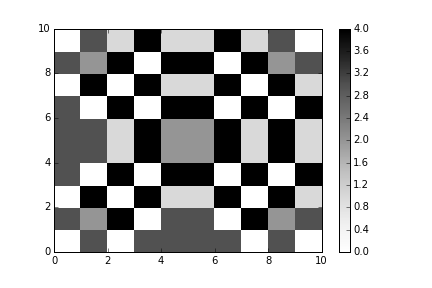
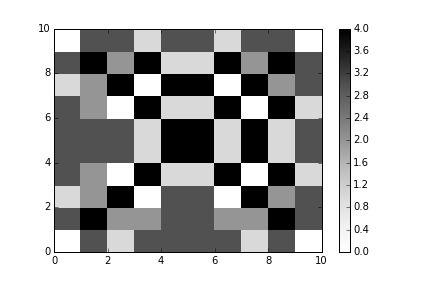
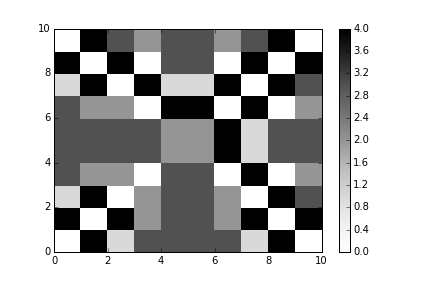
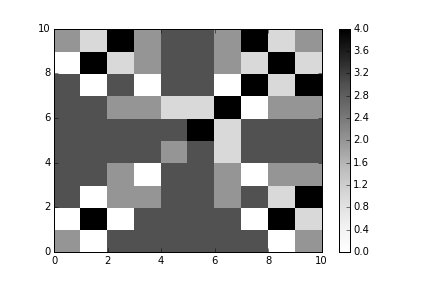
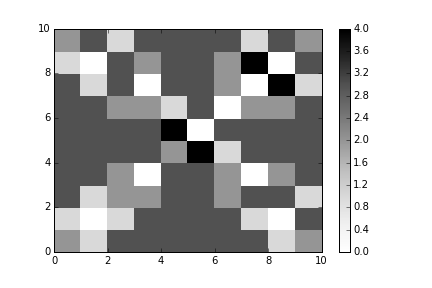
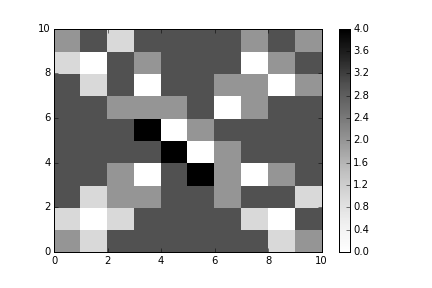
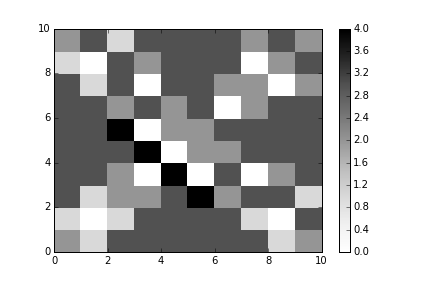
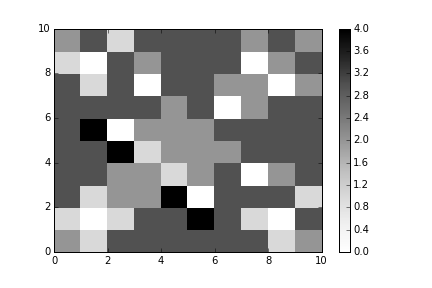
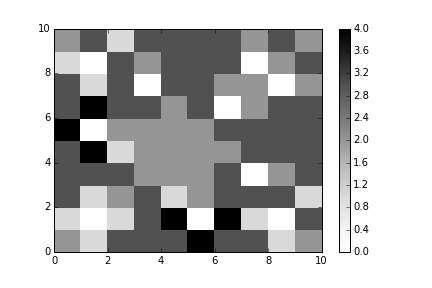
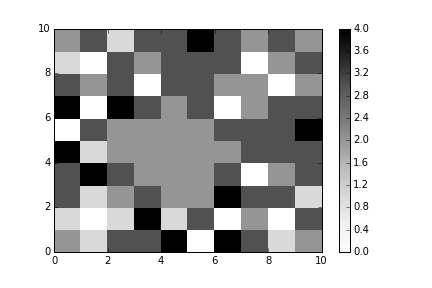
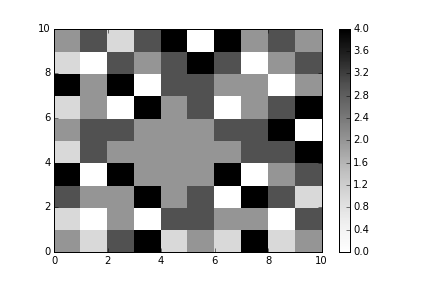
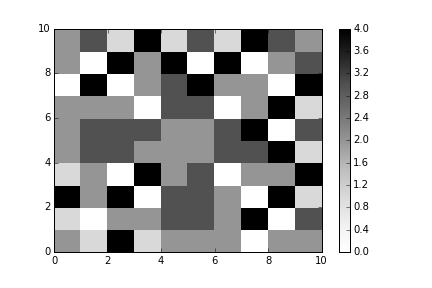
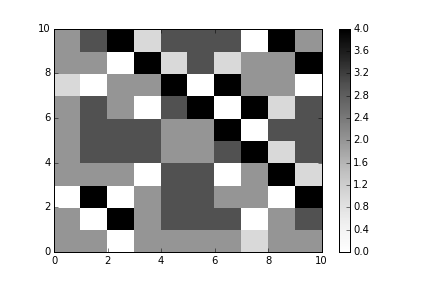
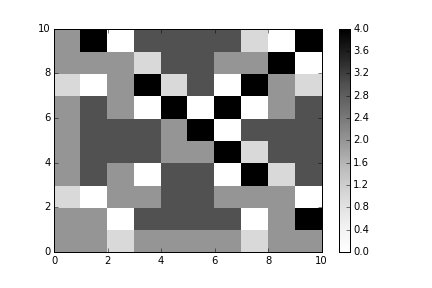
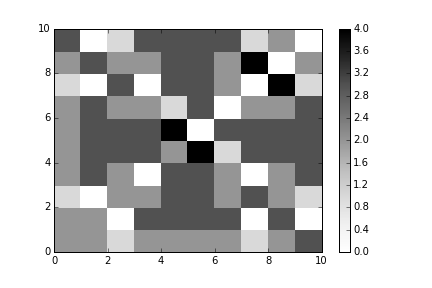
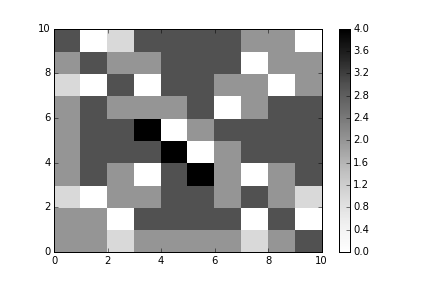
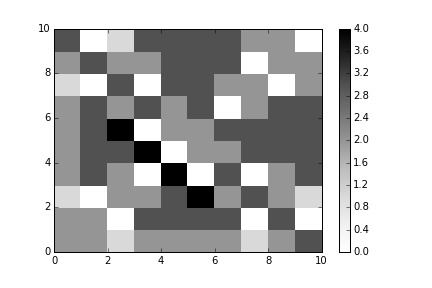
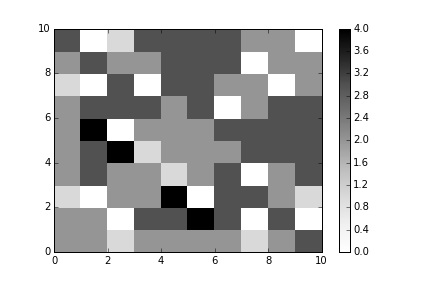
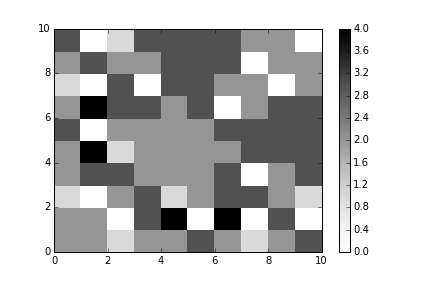
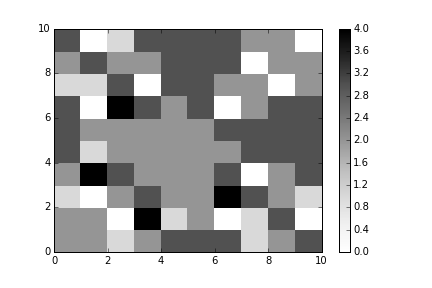
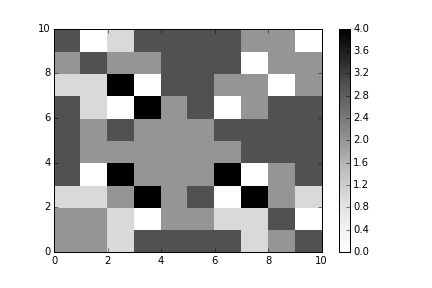
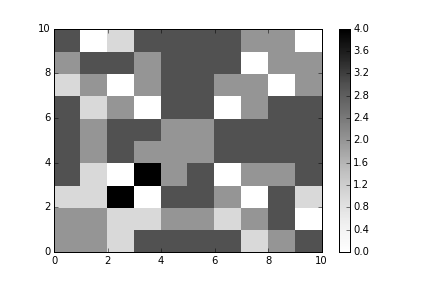
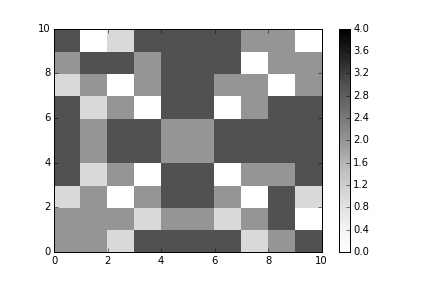
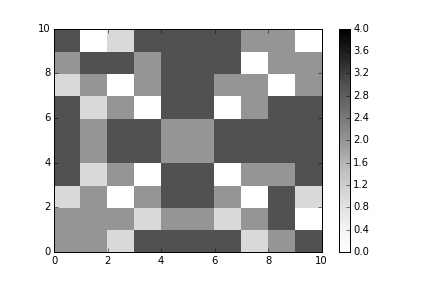

In [329]:
class SandViewer(object):
    def __init__(self, sand, interval=500, cmap=matplotlib.cm.Greys):
        from matplotlib import animation
        from JSAnimation import IPython_display
        
        self.cmap = cmap
        self.interval = interval
        self.sand = sand
    
    def frame_generator(self, debug=False):
        i = 5
        self.previous_state = False
        while np.any(self.previous_state != sand.array):
            if debug:
                if i >= 100: break
            self.previous_state =  sand.array
            i += 1
            if debug: print 'in frame generator', i
            yield i
        
    def run(self, steps=50):
        from JSAnimation import HTMLWriter
        if steps=="complete":
            steps=self.frame_generator()
        self.steps = steps
        
        self.fig = plt.figure()
        self.ax = plt.axes()
        a = self.sand.array
        self.mesh = self.ax.pcolormesh(a, cmap=self.cmap)
        anim = animation.FuncAnimation(self.fig,
                                       self.animate,
                                       init_func=self.init,
                                       frames=self.steps, 
                                       interval=self.interval, 
                                       blit=False)
        return anim
    def init(self, verbose=True):
        if verbose: print "starting animation"
        a = self.sand.array
        self.mesh = self.ax.pcolormesh(a, cmap=self.cmap,
                                       vmin=0, vmax=self.sand.k)
        return self.mesh, 
    
    def animate(self, i ):
        self.sand.step()
        a = self.sand.array
#         self.mesh = self.ax.pcolormesh(a, cmap=self.cmap)
        self.mesh.set_array(a.ravel())
        return self.mesh,

sand = SandPile(n=10)
sv = SandViewer(sand)
sv.run('complete')



In [311]:
k = np.arange(16).reshape(4,4)
print k
k[-1:3,0:100] += 1
k

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [328]:
plt.colorbar?


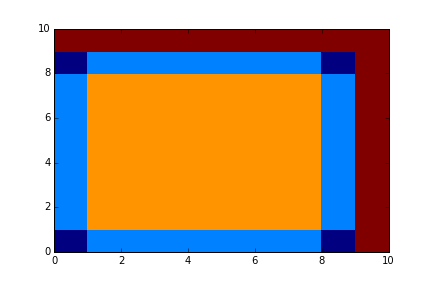
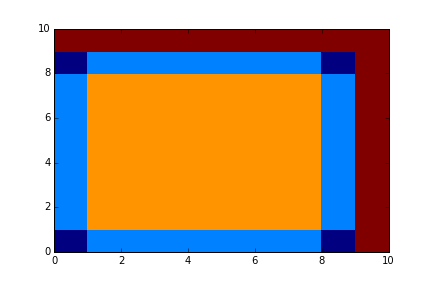
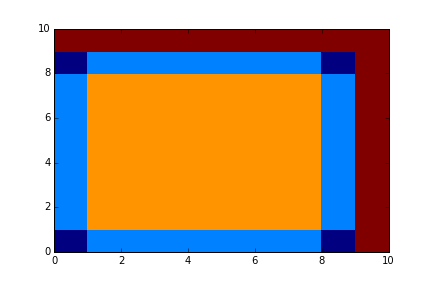
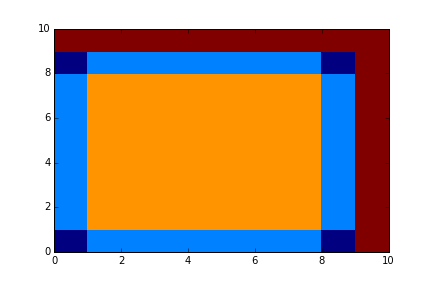
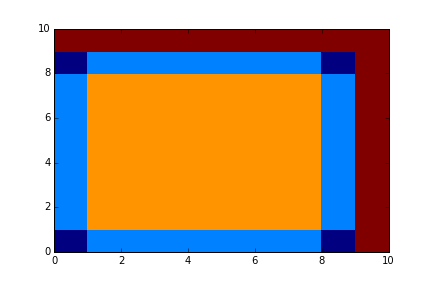
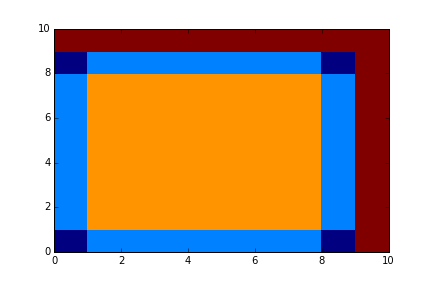
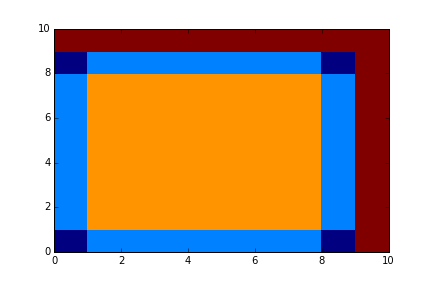
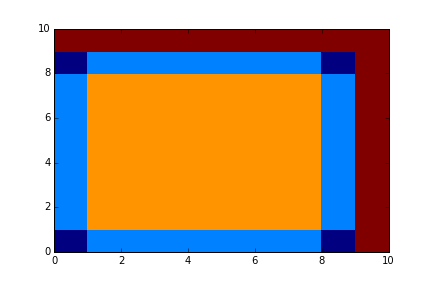
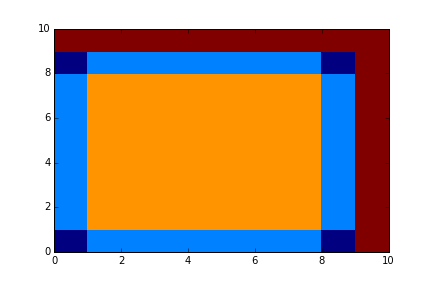
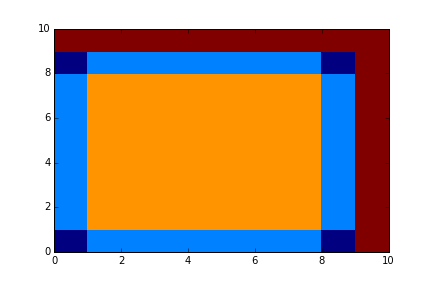
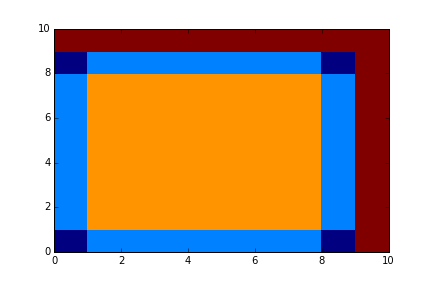
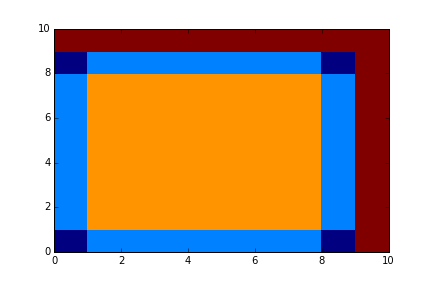
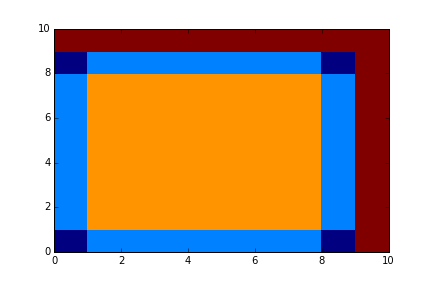
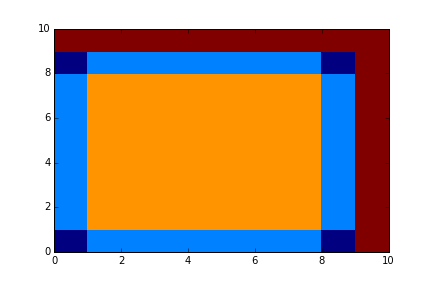
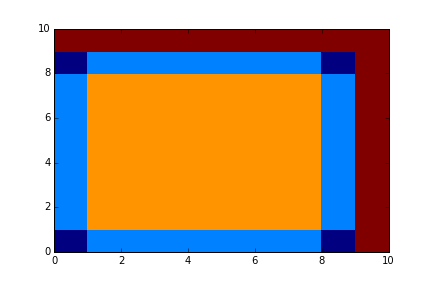
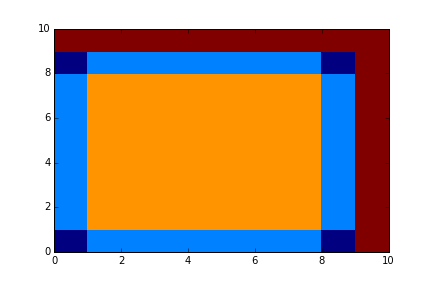
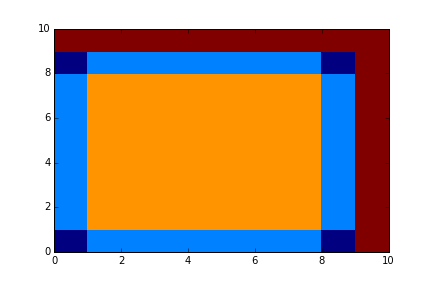
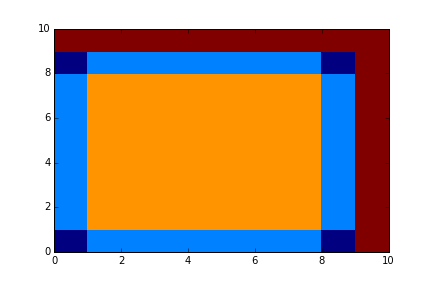
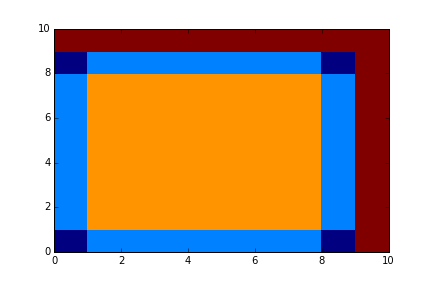
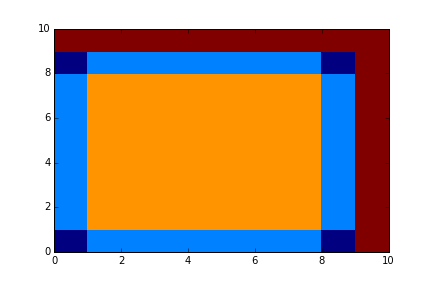

In [216]:
###Do Not Delete:
#sand viewer
sand = SandPile()
a = sand.array
fig, ax = plt.subplots()

def animate(i):
    sand.step()
    a = sand.array
    mesh = ax.pcolormesh(a)
    return mesh,

mesh = ax.pcolormesh(a)
animation.FuncAnimation(fig, 
                        animate,
                        frames=20, 
                        interval=500, 
                        blit=False)